# Trabalho Final SGBD (Aprendizado de Máquina I)
Autores: Adriano Leal, Jonatas Van Groll Lemos e Roselaine Kszesinski Moreira

Base de dados utilizada: http://archive.ics.uci.edu/ml/datasets/Heart+Disease 
<p>Objetivo: 
    Prever se houve estreitamento do diâmetro do coração, fato que pode causar uma doença cardíaca.</p>

## Bibliotecas utilizadas

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import VotingClassifier

In [104]:
df = pd.read_csv('heart.csv', delimiter = ',')

# Análise Exploratória dos Dados

<p>Analisando o conjunto de dados notamos que constam colunas com valores nulos.</p>

In [105]:
print("Informações sobre as colunas")
print(df.info())

Informações sobre as colunas
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  num       303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None


In [106]:
print("Quantidade de valores nulos de cada coluna")
print(df.isnull().sum())

Quantidade de valores nulos de cada coluna
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64


## Calculando medidas estatísticas sobre todas as colunas numéricas:

In [107]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<h6>Algumas plotagens para facilitar a compreensão dos dados:</h6>

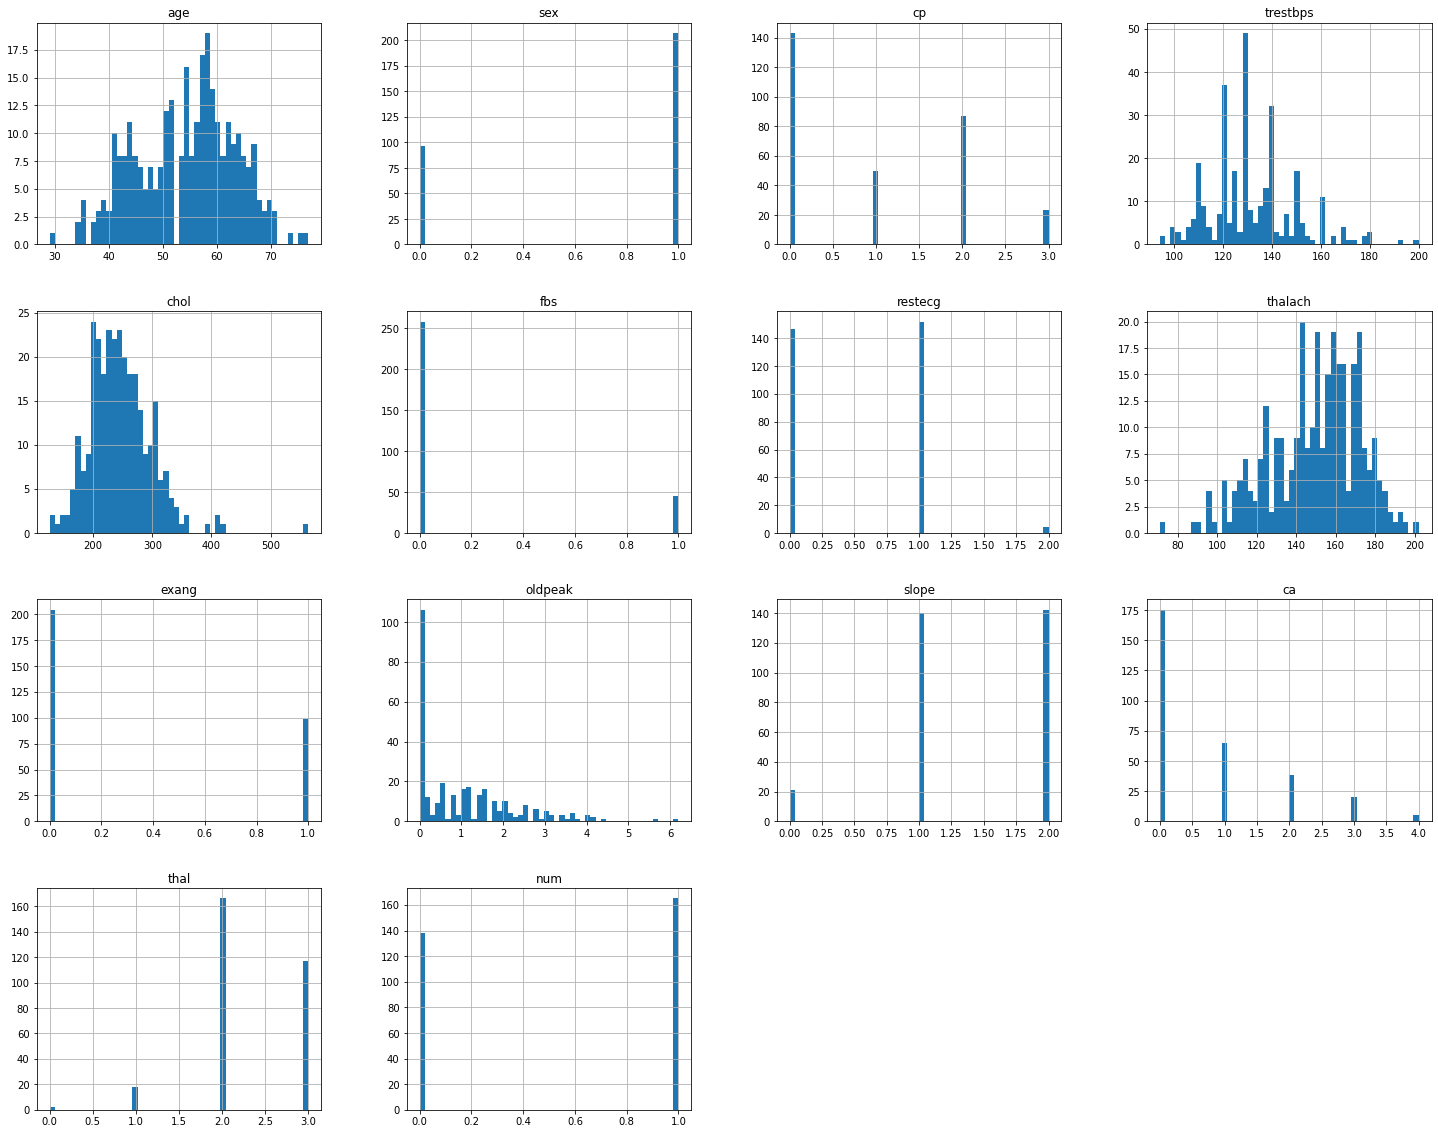

In [108]:
df.hist(bins = 50, figsize = (25, 20))
plt.show()

<h6>Avaliando a correlação entre as todas as variáveis do dataset, para verificar quais colunas tem uma correlação linear forte:</h6>

In [109]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


<h6>Salvando os dados obtidos em um arquivo "csv" para melhor visualização:</h6>

In [110]:
#df.corr().to_csv('dados_correlacao.csv',sep=';',decimal=',')

#### ATENÇÃO: Para gerar o arquivo .CSV com os dados de Correlação é preciso descomentar o comando acima.

# Pré-processamento
<p>Algumas colunas quase não têm valor e não serão usadas então foram excluídas. Também algumas colunas eram irrelevantes ou fortemente relacionadas à outras colunas e também foram excluídas.
Para as colunas quantitativas, usamos a média.
Para as colunas da categóricas, o valor foi substituído pelo de mais frequência.</p>

### Remoção de colunas não utilizadas, não necessárias ou com alta correlação:

In [111]:
nome_colunas_remover = []
df = df.drop(columns=nome_colunas_remover)

#remoção de linhas nulas
df = df.dropna()

<h4>Conjuntos de dados de Treino & Teste</h4>

In [112]:
df_treino, df_teste = train_test_split(df, test_size=0.2, random_state=42)

<h6>Coluna Alvo</h6>

In [113]:
df_treino_labels = df_treino['num'].copy()
df_treino        = df_treino.drop(columns='num')

<h6>Separando a coluna alvo do conjunto de teste</h6>

In [114]:
df_teste_labels = df_teste['num'].copy()
df_teste        = df_teste.drop(columns='num')

df = df.drop(columns='num')

In [115]:
nomes_atributos_numericos   = ['age','trestbps','chol','thalach','oldpeak',]
nomes_atributos_categoricos = ['cp','slope','ca','thal']
nomes_atributos_binarios    = ['sex','fbs','restecg','exang']

In [116]:
pipeline_atr_numericos = Pipeline([
    ('imputer',SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
])

preproc_completo = ColumnTransformer([
    ('numericos',   pipeline_atr_numericos, nomes_atributos_numericos),
    ('binarios',    'passthrough',          nomes_atributos_binarios),
    ('categoricos', OneHotEncoder(),        nomes_atributos_categoricos),
    ], 
    sparse_threshold=0)

In [117]:
# pre-processamento do conjunto de treino
X_treino = preproc_completo.fit_transform(df_treino)
# pre-processamento do conjunto de teste
X_teste = preproc_completo.transform(df_teste)
# pre-processamento da coluna alvo para treino
y_treino = df_treino_labels.values
# pre-processamento da coluna alvo para teste
y_teste = df_teste_labels.values

<h6>Matiz de correlação das colunas do conjunto de dados (dataset)</h6>

In [118]:
corr = np.corrcoef(df[nomes_atributos_numericos], rowvar = False)
dfcorr = pd.DataFrame(corr, index = nomes_atributos_numericos, columns = nomes_atributos_numericos)
dfcorr

,age,trestbps,chol,thalach,oldpeak
age,1.000000,0.279351,0.213678,-0.398522,0.210013
trestbps,0.279351,1.000000,0.123174,-0.046698,0.193216
chol,0.213678,0.123174,1.000000,-0.009940,0.053952
thalach,-0.398522,-0.046698,-0.009940,1.000000,-0.344187
oldpeak,0.210013,0.193216,0.053952,-0.344187,1.000000


# Treinamento do Modelo

Abaixo seguem os atributos de treino utilizados para o teste do treinamento:

### Regressão logística

In [119]:
log_reg = LogisticRegression(max_iter=100)
log_reg.fit(X_treino, y_treino)
y_previsto_reglog = log_reg.predict(X_teste)
#y_probabilidade_reglog = log_reg.predict_proba(X_teste)
#print(np.round(y_probabilidade_reglog,decimals=2))

# Desempenho da regressão logística
print("Matriz de confusão:")
print(confusion_matrix(y_teste,y_previsto_reglog))
print()
print("Acurácia: ", accuracy_score(  y_teste, y_previsto_reglog))
print("Precisão: ", precision_score( y_teste, y_previsto_reglog, pos_label=1))
print("Recall  : ", recall_score(    y_teste, y_previsto_reglog, pos_label=1))
print("F1      : ", f1_score(        y_teste, y_previsto_reglog, pos_label=1))

Matriz de confusão:
[[26  3]
 [ 4 28]]

Acurácia:  0.8852459016393442
Precisão:  0.9032258064516129
Recall  :  0.875
F1      :  0.8888888888888888


### Árvore de Decisão

<p>Foi avaliado o desempenho de diversas árvores de decisão para permitir a busca pelo maior score F1<p>

In [120]:
for i in range(1, 10):
    arvore = DecisionTreeClassifier(max_depth=i)
    arvore.fit(X_treino, y_treino)
    y_previsto_arvore = arvore.predict(X_teste)
    #y_probabilidade_arvore = arvore.predict_proba(X_teste)
    #print(np.round(y_probabilidade_arvore,decimals=2))
    

    # Desempenho da árvore de decisão
    print("Matriz de confusão:")
    print(confusion_matrix(y_teste,y_previsto_arvore))
    print()
    print("Acurácia: ", accuracy_score(  y_teste, y_previsto_arvore))
    print("Precisão: ", precision_score( y_teste, y_previsto_arvore, average='macro', zero_division=0, pos_label=1))
    print("Recall  : ", recall_score(    y_teste, y_previsto_arvore, average='macro', zero_division=0, pos_label=1))
    print("F1      : ", f1_score(        y_teste, y_previsto_arvore, average='macro', zero_division=0, pos_label=1))

Matriz de confusão:
[[25  4]
 [ 8 24]]

Acurácia:  0.8032786885245902
Precisão:  0.8073593073593073
Recall  :  0.8060344827586207
F1      :  0.8032258064516129
Matriz de confusão:
[[27  2]
 [15 17]]

Acurácia:  0.7213114754098361
Precisão:  0.768796992481203
Recall  :  0.7311422413793103
F1      :  0.7136150234741784
Matriz de confusão:
[[25  4]
 [ 7 25]]

Acurácia:  0.819672131147541
Precisão:  0.8216594827586207
Recall  :  0.8216594827586207
F1      :  0.8196721311475409
Matriz de confusão:
[[24  5]
 [ 4 28]]

Acurácia:  0.8524590163934426
Precisão:  0.8528138528138528
Recall  :  0.8512931034482758
F1      :  0.8518218623481781
Matriz de confusão:
[[24  5]
 [ 6 26]]

Acurácia:  0.819672131147541
Precisão:  0.8193548387096774
Recall  :  0.8200431034482758
F1      :  0.8194780737153617
Matriz de confusão:
[[25  4]
 [ 7 25]]

Acurácia:  0.819672131147541
Precisão:  0.8216594827586207
Recall  :  0.8216594827586207
F1      :  0.8196721311475409
Matriz de confusão:
[[26  3]
 [ 6 26]]

Acur

### RandomForest com SKLearn

In [121]:
rndfrst = RandomForestClassifier(n_estimators=10, max_features=0.7, max_samples=0.5, n_jobs=-1)
rndfrst.fit(X_treino, y_treino)
y_previsto_rndfrst = rndfrst.predict(X_teste)

#Probabilidade random forest
#y_probabilidade_rndfrst = rndfrst.predict_proba(X_teste)
#print(np.round(y_probabilidade_rndfrst,decimals=2))

#Desempenho com RandomForest
print("Matriz de confusão:")
print(confusion_matrix(y_teste,y_previsto_rndfrst))
print()
print("Acurácia: ", accuracy_score(  y_teste, y_previsto_rndfrst))
print("Precisão: ", precision_score( y_teste, y_previsto_rndfrst, pos_label=1))
print("Recall  : ", recall_score(    y_teste, y_previsto_rndfrst, pos_label=1))
print("F1      : ", f1_score(        y_teste, y_previsto_rndfrst, pos_label=1))

Matriz de confusão:
[[26  3]
 [10 22]]

Acurácia:  0.7868852459016393
Precisão:  0.88
Recall  :  0.6875
F1      :  0.7719298245614036


### Bagging com SKLearn

In [122]:
log_reg_bagg = BaggingClassifier(LogisticRegression(max_iter=3), n_estimators=7, max_features=0.7, max_samples=0.5, n_jobs=-1)
log_reg_bagg.fit(X_treino, y_treino)
y_previsto_bagging_reg_log = log_reg_bagg.predict(X_teste)

#Desempenho com Bagging de Regressão Logística
print("Matriz de confusão:")
print(confusion_matrix(y_teste, y_previsto_bagging_reg_log))
print()
print("Acurácia: ", accuracy_score(  y_teste, y_previsto_bagging_reg_log))
print("Precisão: ", precision_score( y_teste, y_previsto_bagging_reg_log, average='macro', zero_division=0, pos_label=1))
print("Recall  : ", recall_score(    y_teste, y_previsto_bagging_reg_log, average='macro', zero_division=0, pos_label=1))
print("F1      : ", f1_score(        y_teste, y_previsto_bagging_reg_log, average='macro', zero_division=0, pos_label=1))

Matriz de confusão:
[[26  3]
 [ 4 28]]

Acurácia:  0.8852459016393442
Precisão:  0.8849462365591398
Recall  :  0.8857758620689655
F1      :  0.8851224105461394


<h1>Modelo Final</h1>

### Conclusão

**Foi observado que os resultados do random forest, essemble e da árvore de decisão não excederam o Score F1 da regressão logística. Tal resultado foi considerado para definir Regressão Logística como modelo final e seu F1 Score é de 0.8**